In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset.csv"
df = pd.read_csv(file_path)
print(df.head())
df.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56    Male         88.3        1.71                      1.69   
1   46  Female         74.9        1.53                      1.30   
2   32  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   38    Male         46.1        1.79                      0.64   

   Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313         Yoga            12.6                    3.5   
1              883         HIIT            33.9                    2.1   
2              677       Cardio            33.4                    2.3   
3              532     Strength            28.8                    2.1   
4              556     Strength            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2             

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       8
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              6
dtype: int64

In [3]:
df.isnull().sum()
df.fillna({
    'Fat_percentage': df['Fat_Percentage'].mean(),
    'Height (m)': df['Height (m)'].mean(),
    'BMI': df['BMI'].mean(),
}, inplace=True
)

if 'Fat_Percentage' in df.columns:
    df['Fat_Percentage'] = df['Fat_Percentage'].fillna(df['Fat_Percentage'].mode()[0])

df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [12]:
X = df.iloc[:, :-1]
y = le.fit_transform(df.iloc[:, -1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6103
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70        36
           1       0.47      0.49      0.48        45
           2       0.85      0.53      0.65        55

    accuracy                           0.61       136
   macro avg       0.63      0.64      0.61       136
weighted avg       0.65      0.61      0.61       136



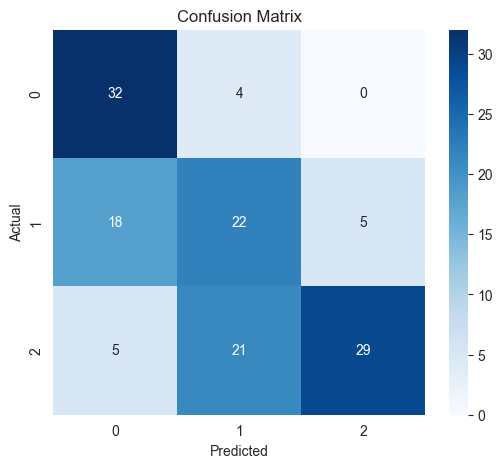

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

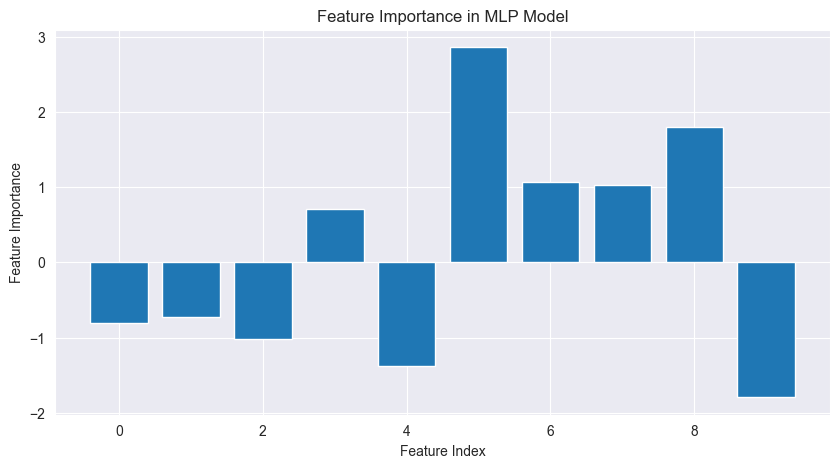

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), mlp.coefs_[0].sum(axis=1))
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in MLP Model')
plt.show()